##<center> Problema zilei de nastere</center>##

In acest notebook calculam probabilitatile evenimentelor $E_n$, ca intr-un grup de n persoane, $2\leq n\leq 365$, sa existe cel putin doua cu aceeasi zi de nastere
si vizualizam comparativ aceste probabilitati.

Apoi generam aleator zilele de nastere si verificam  ca probabilitatile experimentale sunt foarte apropiate de cele teoretice.

Formula teoretica de calcul a probabilitatii a cel putin unei coincidente a zilelor de nastere intr-un grup de $n$ persoane, dedusa in Cursul 7, este:

$P(E_n)=1-\displaystyle\prod_{k=1}^{n-1}\left(1-\displaystyle\frac{k}{365}\right)$

Definim functia recursiva `prob_theor` ce calculeaza probabilitatea evenimentului complementar 

$P(\complement E_n)=\displaystyle\prod_{k=1}^{n-1}\left(1-\displaystyle\frac{k}{365}\right)$

In [1]:
from __future__ import division

In [2]:
def prob_theor(n):
    if n==2: 
        return (1-1/365)
    else: 
        return prob_theor(n-1)*(1-(n-1)/365)


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # setam stilul de afisare a plot-urilor. 
                         # Incepand cu matplotlib 1.4 s-au introdus mai multe stiluri
                         # http://matplotlib.org/users/style_sheets.html

In [4]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)

Calculam acum probabilitatile de coincidenta a cel putin 2 zile de nastere intr-un grup de $n$ persoane cu
$2\leq n\leq 60$ si le reprezentam grafic:

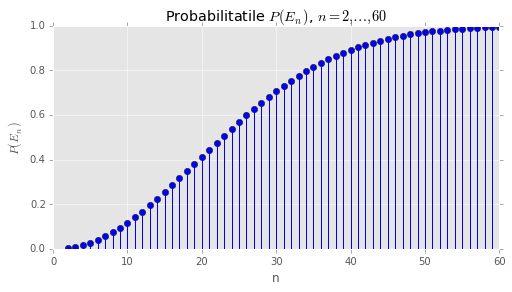

In [5]:
nrPartic=60
probsEn=[1- prob_theor(n) for n in range(2,nrPartic+1)]
n=[ k for k in range(2, nrPartic+1)]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.stem(n, probsEn,  'b', bottom=0)
ax.set_xlabel('n')
ax.set_ylabel(r'$P(E_n)$')
ax.set_title('Probabilitatile $P(E_n)$, $n=2,\ldots, 60$')

Afisam probabilitatile calculate:

In [6]:
import numpy as np
print np.array(probsEn).round(3)

[ 0.003  0.008  0.016  0.027  0.04   0.056  0.074  0.095  0.117  0.141
  0.167  0.194  0.223  0.253  0.284  0.315  0.347  0.379  0.411  0.444
  0.476  0.507  0.538  0.569  0.598  0.627  0.654  0.681  0.706  0.73
  0.753  0.775  0.795  0.814  0.832  0.849  0.864  0.878  0.891  0.903
  0.914  0.924  0.933  0.941  0.948  0.955  0.961  0.966  0.97   0.974
  0.978  0.981  0.984  0.986  0.988  0.99   0.992  0.993  0.994]


Pentru a verifica experimental problema zilei de nastere, prezentam mai intai cateva elemente de programare Python ce le vom folosi.


Vom genera un dictionar ce are drept chei zilele de nastere de la 1 la 365 inclusiv si fiecarei chei ii atribuim 
numarul de persoane din cele $n$ ce au acea zi de nastere.

Pentru a crea dictionarul in mod compact si nu explicit, procedam astfel:  general lista `nrbdays=[0]*365` de lungime 365, ce are setate toate elementele pe $0$ (la inceputul experimentuluinu stim inca zilele de nasere ale participantilor).



In general unei liste `L=[2, 3, 'u', 'z']`  i se asociaza o lista de cupluri $(i, L[i])$  apeland functia `enumerate(L)`:


In [7]:
L=[2, 3, 'u', 'z']
print list(enumerate(L))

[(0, 2), (1, 3), (2, 'u'), (3, 'z')]


Pentru a incepe numararea de la 1, nu de la 0, setam  startul  astfel:

In [8]:
print list(enumerate(L, start=1))

[(1, 2), (2, 3), (3, 'u'), (4, 'z')]


Astfel din lista `nrbdays` generam dictionarul de interes astfel: `birthdays=dict(enumerate(nrbdays, start=1))`.
Cu alte cuvinte, dictionarul va avea drept chei "numerele de ordine" al perechii

In [9]:
nrbdays=[0]*365
birthdays=dict(enumerate(nrbdays, start=1))
print birthdays

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 138: 0, 139

Pentru simulare importam functia `randint(m,n)` care genereaza uniform (cu aceeasi probabilitate) numere din multimea de intregi $\{m,m+1, \ldots, n\}$, $m<n$.

In [10]:
from  random import randint

def bdayExper(nrP=23): #nrP= numarul de participanti la chef
    
    #generam aleator cate o zi de nastere si marim cu 1 contorul ce da nr de participandti nascuti in acea zi
    # calculam si returnam nr de coincidente
    
    coincidence=0 # initial nu exista nicio coincidenta
    nrbdays=[0]*365 #numarul initial de participanti nascuti intr-o zi a anului este 0
    birthdays=dict(enumerate(nrbdays, start=1))  # creaza dictionarul  {1:0, 2:0, ...., 365:0}
    for n  in range(nrP):
        birthdays[randint(1,365)]+=1 #actualizam datele din dictionar
    for k in birthdays.keys(): # parcurgem dictionarul si numaram cate coincidente s-au inregistrat
                               # intr-o singura simulare
        if  birthdays[k]>1:
             coincidence+=1
    return coincidence            

Acum repetam experimentul aleator de $N$ ori cu acelasi nr de participanti si calculam nr de coincidente in fiecare
incercare:

In [11]:
N=1000
nrP=30
Lcoinc=[bdayExper(nrP=30) for k in range(N)]# lista numarului de coincidente in fiecare incercare din cele N

#E mai simplu sa numaram cate incercari exista fara nicio coincidenta:
NrCoinc0=Lcoinc.count(0)# numarul de incercari cu nicio coincidenta

print  'Probabilitate experimentala a cel putin unei coincidente intr-un grup de ', nrP, 'persoane este:',\
       1.0*(N-NrCoinc0)/N, '\n', 'Probabilitatea teoretica:', 1-prob_theor(nrP) 

Probabilitate experimentala a cel putin unei coincidente intr-un grup de  30 persoane este: 0.731 
Probabilitatea teoretica: 0.706316242719


In [12]:
print 'Lista numarului de coincidente in fiecare incercare din cele N', Lcoinc

Lista numarului de coincidente in fiecare incercare din cele N [2, 1, 3, 0, 1, 0, 0, 2, 1, 0, 0, 3, 1, 2, 0, 2, 2, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2, 0, 1, 3, 3, 1, 2, 0, 2, 1, 1, 0, 0, 2, 1, 3, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 3, 1, 1, 3, 1, 4, 0, 2, 3, 2, 1, 1, 2, 2, 2, 3, 0, 1, 2, 2, 3, 2, 2, 2, 3, 1, 0, 0, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 3, 0, 2, 3, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 2, 1, 0, 1, 3, 1, 1, 0, 1, 2, 3, 0, 0, 3, 1, 1, 1, 1, 1, 0, 1, 0, 3, 1, 2, 1, 0, 0, 1, 0, 1, 3, 0, 2, 1, 1, 2, 1, 1, 2, 1, 0, 3, 1, 0, 1, 1, 0, 2, 3, 0, 0, 1, 2, 0, 0, 1, 0, 3, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 1, 4, 1, 3, 3, 1, 2, 1, 2, 4, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 4, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 3, 2, 1, 0, 1, 0, 1, 3, 1, 1, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 0, 1, 2, 1, 0, 2, 2, 

In [13]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()